## 1 Glorot & He Initialization

* Glorot Initializer:
  * if normal distribution, $\sigma^2 = \frac{1}{{fan}_{avg}}$
  * if uniform distribution(-r and +r), $r = \sqrt{\frac{3}{fan_{avg}}}$

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
[name for name in dir(keras.initializers) if not name.startswith('_')]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [20]:
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

In [21]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation='relu', kernel_initializer=init)

## 2 Nonsaturating Activation Functions 非饱和激活函数

### 2-1 Leaky ReLU

[-5, 5, -0.5, 4.2]

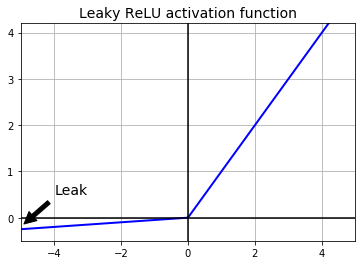

In [22]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

import matplotlib.pyplot as plt
import numpy as np

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.05), 'b-', lw=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha='center')
plt.title('Leaky ReLU activation function', fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

In [23]:
[m for m in dir(keras.activations) if not m.startswith('_')]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

In [24]:
[m for m in dir(keras.layers) if 'relu' in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [25]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [26]:
tf.random.set_seed(42)
np.random.seed(42)

In [28]:
# try a sequential model using leaky-relu
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation='softmax'),
])

In [30]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 128us/sample - loss: 1.2806 - accuracy: 0.6250 - val_loss: 0.8882 - val_accuracy: 0.7152
Epoch 2/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.7954 - accuracy: 0.7373 - val_loss: 0.7134 - val_accuracy: 0.7648
Epoch 3/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.6816 - accuracy: 0.7727 - val_loss: 0.6356 - val_accuracy: 0.7882
Epoch 4/10
55000/55000 [==============================] - 6s 110us/sample - loss: 0.6215 - accuracy: 0.7936 - val_loss: 0.5922 - val_accuracy: 0.8010
Epoch 5/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.5830 - accuracy: 0.8081 - val_loss: 0.5596 - val_accuracy: 0.8172
Epoch 6/10
55000/55000 [==============================] - 6s 117us/sample - loss: 0.5553 - accuracy: 0.8155 - val_loss: 0.5338 - val_accuracy: 0.8238
Epoch 7/10
55000/55000 [===========================

### 2-2 PReLU

* Parameter ReLU, alpha 参数可以在训练期间学习

In [31]:
# try a sequential model using PReLU
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 139us/sample - loss: 1.3360 - accuracy: 0.6137 - val_loss: 0.8954 - val_accuracy: 0.7244
Epoch 2/10
55000/55000 [==============================] - 7s 133us/sample - loss: 0.8048 - accuracy: 0.7419 - val_loss: 0.7109 - val_accuracy: 0.7756
Epoch 3/10
55000/55000 [==============================] - 7s 134us/sample - loss: 0.6849 - accuracy: 0.7771 - val_loss: 0.6314 - val_accuracy: 0.7990
Epoch 4/10
55000/55000 [==============================] - 7s 133us/sample - loss: 0.6235 - accuracy: 0.7954 - val_loss: 0.5884 - val_accuracy: 0.8138
Epoch 5/10
55000/55000 [==============================] - 7s 130us/sample - loss: 0.5844 - accuracy: 0.8069 - val_loss: 0.5570 - val_accuracy: 0.8170
Epoch 6/10
55000/55000 [==============================] - 7s 130us/sample - loss: 0.5566 - accuracy: 0.8147 - val_loss: 0.5304 - val_accuracy: 0.8236
Epoch 7/10
55000/55000 [===========================

### 2-3 ELU

$$ELU_{\alpha}(z) = \left\{
\begin{array}{lr}
\alpha (\rm{exp}(z)-1) & {\rm if} z < 0 \\
z & {\rm if} z \geqslant 0
\end{array}
\right.$$

* 当 z 为较大的负数时，函数将逼近 -alpha
* ELU 直接在定义层的时候指定激活函数为'elu' 即可

In [32]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

[-5, 5, -2.2, 3.2]

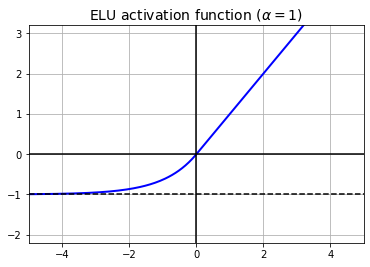

In [35]:
plt.plot(z, elu(z), 'b-', lw=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r'ELU activation function ($\alpha=1$)', fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

In [36]:
keras.layers.Dense(10, activation='elu')

### 2-4 SELU

* Scaled ELU, 若所有网络层都是 Dense，激活函数 SELU 可以保证网络是自归一化的。
* 输入特征必须标准化，每个隐层的权重必须使用 LeCun 正态初始化。必须是顺序架构，或者某些卷积。

In [37]:
from scipy.special import erfc

[-5, 5, -2.2, 3.2]

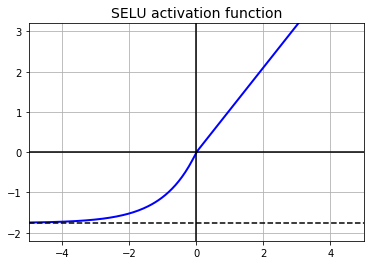

In [40]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

In [41]:
# 检验 SELU 的自归一化
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [42]:
# selu 的使用
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [43]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [44]:
# 将输入的均值和方差进行标准化
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [45]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 55s 995us/sample - loss: 1.2653 - accuracy: 0.5067 - val_loss: 0.7577 - val_accuracy: 0.7172
Epoch 2/5
55000/55000 [==============================] - 44s 800us/sample - loss: 0.6850 - accuracy: 0.7552 - val_loss: 0.6563 - val_accuracy: 0.7666
Epoch 3/5
55000/55000 [==============================] - 42s 767us/sample - loss: 0.6342 - accuracy: 0.7742 - val_loss: 0.6332 - val_accuracy: 0.7906
Epoch 4/5
55000/55000 [==============================] - 44s 800us/sample - loss: 0.5795 - accuracy: 0.8002 - val_loss: 0.4753 - val_accuracy: 0.8388
Epoch 5/5
55000/55000 [==============================] - 47s 847us/sample - loss: 0.4790 - accuracy: 0.8351 - val_loss: 0.4710 - val_accuracy: 0.8414
